# Лекция 1

## Создание и визуализация просты графов

## 1. 

1\.1\. Создать функцию генерирующую кольцевой граф из n узлов (n - параметр функции)

1\.2\. Визуализировать граф, построенный с помощью фукнции из задания 1. 

Документация:
* https://networkx.github.io/documentation/stable/tutorial.html#drawing-graphs
* https://networkx.github.io/documentation/stable/reference/drawing.html


## 2. 

2\.1\. Построить квадратную решетку 5 на 4 используя встроенную функцию NetworkX и визуализировать ее.

2\.2\. Реализовать собственную функцию создания квадратной решетки n на m. Создать с ее помощью решетку 5 на 4 и визуализировать ее.

2\.3\. Реализовать собственную функцию создания квадратной решетки n на m, которая сохраняет в графе информацию, позволяющую визуализировать решетку в виде решетки с узлами, занимающими соответствующие позиции на графике. Создать с ее помощью решетку 5 на 4 и визуализировать ее в виде "правильной" решетки.

2\.4\. Модифицировать функцию 2\.2\. так, чтобы рештку можно было замыкать по строкам и по столбцам (с помощью соответсвующих параметров функции). Проверить результат работы функции визуально.

2\.5-2\.8 Аналогичные задачи для треугольных решеток.

2\.9-2\.12\* Аналогичные задачи для гексогональных решеток.

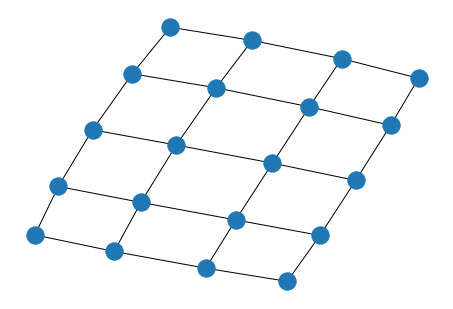

In [139]:
# 2.1 Построить квадратную решетку 5 на 4 используя встроенную функцию NetworkX и визуализировать ее.
import networkx as nx
import matplotlib.pyplot as plt

n = 5
m = 4
G = nx.grid_graph(dim=[n, m])
nx.draw(G)
plt.show()

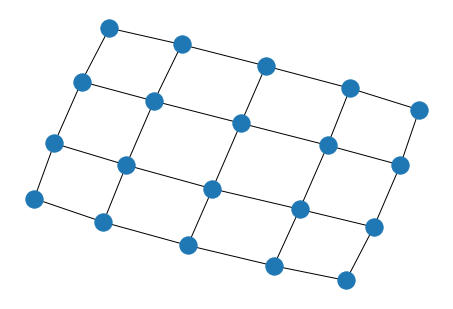

In [146]:
# 2.2 Реализовать собственную функцию создания квадратной решетки n на m. Создать с ее помощью решетку 5 на 4 и визуализировать ее.
def doGrid(n, m):
    import networkx as nx
    import matplotlib.pyplot as plt
    G = nx.Graph()
    for i in range(n):
        for j in range(m):
            if i < n - 1: 
                G.add_edge((j, i), (j, i + 1))
            if j < m - 1: 
                G.add_edge((j, i), (j + 1, i))
    nx.draw(G)

doGrid(5, 4)

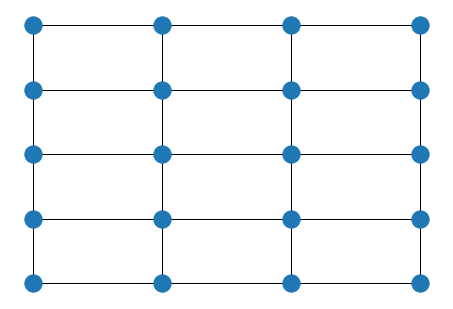

In [141]:
# 2.3. Реализовать собственную функцию создания квадратной решетки n на m, которая сохраняет в графе информацию, позволяющую визуализировать решетку в виде решетки с узлами, занимающими соответствующие позиции на графике. Создать с ее помощью решетку 5 на 4 и визуализировать ее в виде "правильной" решетки.
def doGrid(n, m):
    import networkx as nx
    import matplotlib.pyplot as plt
    G = nx.Graph()
    for i in range(n):
        for j in range(m):
            if i < n - 1: 
                G.add_edge((j, i), (j, i + 1))
            if j < m - 1: 
                G.add_edge((j, i), (j + 1, i))
            pos[(j, i)] = (j, i)
    nx.draw(G, pos = pos)

doGrid(5, 4)

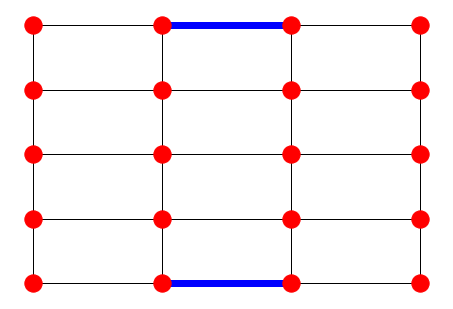

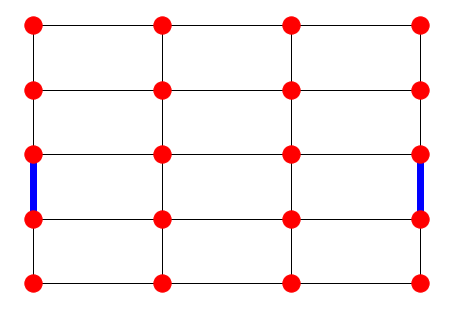

In [144]:
# 2.4. Модифицировать функцию 2.2. так, чтобы рештку можно было замыкать по строкам и по столбцам 
# (с помощью соответсвующих параметров функции). Проверить результат работы функции визуально.

def makeGridAndClosing(n, m, colOrRow, indexs):
    G = nx.grid_2d_graph(m, n)
    for i in range(n):
        for j in range(m):
            pos[(i, j)] = (i, j)
    edges = G.edges()
    for u,v in edges:
        G[u][v]['color'] = "black"
        G[u][v]['weight'] = 1
    if colOrRow == "row":
        G.add_edge((0, indexs[0] - 1), (0, indexs[1] - 1), color="blue", weight=7)
        G.add_edge((m - 1, indexs[0] - 1), (m - 1, indexs[1] - 1), color="blue", weight=7)
    if colOrRow == "col":
        G.add_edge((indexs[0] - 1, 0), (indexs[1] - 1, 0), color="blue", weight=7)
        G.add_edge((indexs[0] - 1, n - 1), (indexs[1] - 1, n - 1), color="blue", weight=7)
    colors = [G[u][v]['color'] for u,v in edges]
    weights = [G[u][v]['weight'] for u,v in edges]
    nx.draw(G, pos, edges=edges, edge_color=colors, node_color="red", width=weights)
    plt.show()
    
makeGridAndClosing(5, 4, "col", [2, 3])
makeGridAndClosing(5, 4, "row", [2, 3])

## 3. 

3\.
Граф «u,v цветок»: фрактальный граф, в котором на каждой итерации роста каждая связь заменяется на 2 пути, длинной u и v соответственно (см.рис). 

__1,2 цветок:__
![1,2 цветок](1_2_fl.png "1,2 цветок")

__2,2 цветок:__
![2,2 цветок](2_2_fl.png "2,2 цветок")


3\.1\. Релизовать функцию построения 1,2 цветка. Функция принимает один целочисленный параметр n - количество шагов построения. 

Для построенного граафа 1.2 цветка получить:

3\.2\. Количество узлов, количество связей, среднюю степень узла.

3\.3\. Визуализацию графа (с указанием идентификаторов узлов).

3\.4\. Степень каждого узла и сохранить информацию о ней в самом узле.

3\.5\. Визуализацию графа, в котрой размер узла определяется его степенью (с указанием идентификаторов узлов).

Количество узлов:  27 
Количество связей:  15 
Cредняя степень узла:  3.6


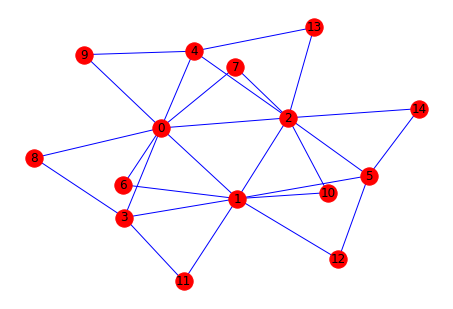

In [4]:
# 3.1-3.4 Релизовать функцию построения 1,2 цветка. Функция принимает один целочисленный параметр n - количество шагов построения.
# Для построенного граафа 1.2 цветка получить:
import networkx as nx
import matplotlib.pyplot as plt

def iteration(G, n):
    for i in range(n - 1): 
        edges = list(G.edges())   
        num = len(G.nodes()) - 1
        for k in edges:
            G.add_edge(k[0], num + 1)
            G.add_edge(num + 1, k[1])
            num += 1

def doFlower(n):
    G = nx.Graph()
    G.add_edge(0, 1)
    G.add_edge(1, 2)
    G.add_edge(2, 0)  
    iteration(G, n)
    # 3.2 - 3.4
    edges = G.edges()
    nodes = G.nodes()
    meanDegree = sum(j for i, j in G.degree()) / len(nodes)
    print("Количество узлов: ", len(edges), "\nКоличество связей: ", len(nodes), "\nCредняя степень узла: ", meanDegree)
    pos = nx.kamada_kawai_layout(G)
    nx.draw(G, pos, with_labels = True, node_color = "red", edge_color="blue")
    

doFlower(3) # 3.1

# 4. 

Датасеты с сетями:

http://networkrepository.com

http://konect.uni-koblenz.de

https://snap.stanford.edu/data/

---

https://networkdata.ics.uci.edu/resources.php

https://kateto.net/2016/05/network-datasets/


Документация:
* https://networkx.github.io/documentation/stable/reference/readwrite/index.html



# 4.

Для построенного граафа 1.2 цветка получить:

4\.1 Значение коэфициента кластеризации каждого узла и сохранить информацию о ней в самом узле.

4\.2 Визуализацию графа, в котрой размер узла определяется его коэффициентом кластреизации.

4\.5 Визуализацию графа, в котрой цвет узла определяется его коэффициентом кластреизации.

4\.6 Визуализацию графа, в котрой коэффициентом кластреизации демонстрируется в подписи к узлу.

4\.7 Среднее значение коэффицента кластеризации для всего графа. (? разные)

# 5.

Для построенного граафа 1.2 цветка получить:

4\.1 Распределение степеней узлов в виде списка картежей вида: (степень, количество\_узлов\_с\_данной\_степенью), картежи в списке отсортированы по возрастанию степени.

4\.2 График распределения степеней узлов.4

4\.3 График распределения степеней узлов, в котором по вертикальной оси откладыватся выборочная частота. Отобразить график в трех масштабах осей: (x, y), (x, ln y), (ln x, ln y).

## 6.

Для построенного граафа 1.2 цветка получить:

5\.1\. Два произвольных узла и кратчайший путь между ними.

5\.2\. Визуализировать кратчайший путь, полученный в предыдущем пункте, используя связи другого цвета и другой толщины.

5\.3\. Средний кратчайший путь для всего графа.

5\.4\. Диаметр графа.

## 7.

7\. Релизовать функцию построения u,v цветка. Функция принимает на вход 3 параметра: u – длина 1го пути при замене связи; v – длина 2го пути при замене связи; n - количество шагов построения. 